# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives


##**Business Context**

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.


##**Objective**

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

## Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

1. user_id - Unique user ID of the person visiting the website

2. group - Whether the user belongs to the first group (control) or the second group (treatment)

3. landing_page - Whether the landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

5. converted - Whether the user gets converted to a subscriber of the news portal or not

6. language_preferred - Language chosen by the user to view the landing page

## Import all the necessary libraries

In [1]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline

import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

## Reading the Data into a DataFrame

In [2]:
# Read the 'abtest.csv' file and save it in the dataframe 'df'
df = pd.read_csv('abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

### View the Dataset

In [ ]:
# View the first 5 rows of the dataset using head function
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# View the last 5 rows of the dataset using the tail function
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


### Shape of the dataset

In [ ]:
# check the shape of the dataset
df.shape

(100, 6)

There are 100 rows and 6 columns in the dataset

### Data types of the columns in the dataset

In [ ]:
# check the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


There are 3 datatypes in the abtest dataset

*   User_id is of type int64
*   group, landing_page, converted and language_preferred are of type object
*   time_spent_on_the_page is of type float64






### Statistical summary of the numerical variables

In [ ]:
# Get the statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


**Observations of statistical summary - Numerical Variables**



*   The mean and the median time spent on the page are almost same giving us an idea that the distribution is normal distribution.
*   The maximum time spent on the page is around 10 minutes compared to a minimum time of 19 seconds.
*   75% of the users have spent atleast 7 minutes on the page.






### Statistical summary of the categorical variables

In [ ]:
df.describe(include='object').T

,count,unique,top,freq
group,100,2,control,50
landing_page,100,2,old,50
converted,100,2,yes,54
language_preferred,100,3,Spanish,34


**Observations of statistical summary - categorical variables**



*   There are 2 unique values in the group, landing_page and converted columns. There are 3 unique values in the language_preferred column.
*   The top value in the group is 'control' and it occurs 50 times.
*   More than 50% of users have converted as subscribers of the E-News express.
*   The top preferred language of the users is Spanish and it occurs 34 times in the dataset.





### Missing value check

In [ ]:
# Checking the missing value in the dataset
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no missing values in the abtest dataset.

### Check duplicate values

In [ ]:
# check for duplicate values in the dataset
dup = df.duplicated()
print(df[dup])

Empty DataFrame
Columns: [user_id, group, landing_page, time_spent_on_the_page, converted, language_preferred]
Index: []


There are no duplicate values in the dataset.

## Univariate Analysis

### **Time spent on the page**

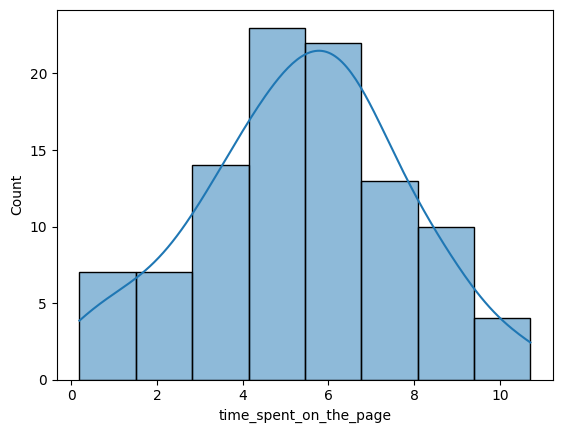

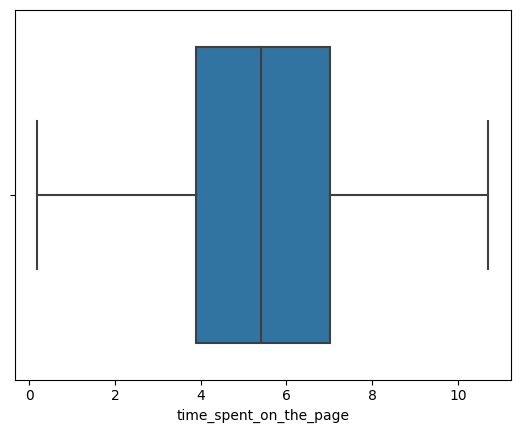

In [ ]:
# Visualise the time_spent_on_the_page using histogram
sns.histplot(data=df,x='time_spent_on_the_page',kde=True)
plt.show()
# Visualise the time_spent_on_the_page using boxplot
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

###Observations


*   The time spent on the page is normally distributed with a minimum of 0.19 seconds and a maximum time of around 10 minutes.
*   The mean and the median time spent is almost same and it is around 5 minutes which gives an idea that 50% of users have spent atleast 5 minutes.
*   There are no outliers in the distribution.

### **Landing Page**

### Check unique values and count

In [ ]:
# check the unique value
df['landing_page'].unique()

array(['old', 'new'], dtype=object)

There are two values (old, new) in landing page

In [ ]:
# check the number of values
df['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

Both 'old' and 'new' value have 50 counts each which is in alignment with the problem statement describing the groups are split equally to test for the new and the old page.

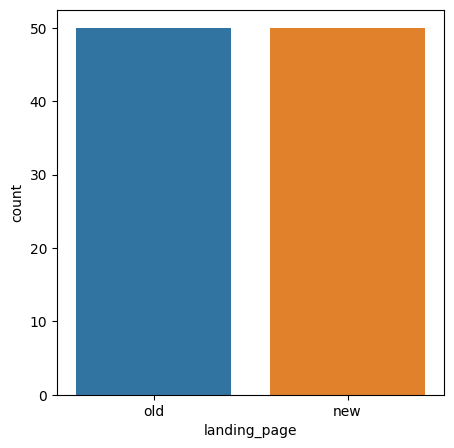

In [ ]:
# Visualize the landing_page variable using bargraph
plt.figure(figsize=(5,5))
sns.countplot(data=df,x= 'landing_page')
plt.show()

### Observations


*   Both the new and the old page have 50 counts each which infers that the users are split equally to test the efficiency of the pages.






### **Group**

### Check unique values and count

In [ ]:
# check unique values in the group
df['group'].unique()

array(['control', 'treatment'], dtype=object)

There are two groups control and treatment.

In [ ]:
# check the number of value
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

The control and treatment groups each have 50 counts

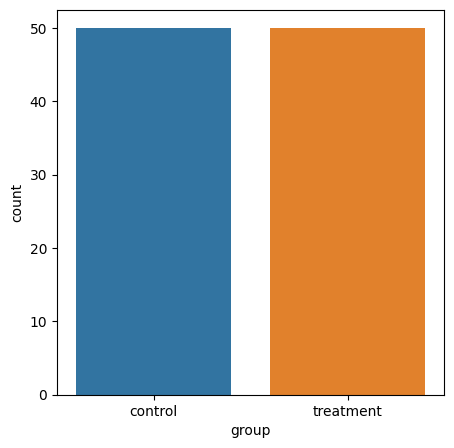

In [ ]:
# Visualize the group variable using bargraph
plt.figure(figsize=(5,5))
sns.countplot(data=df,x= 'group')
plt.show()

###Observations


*   The users are equally split among control and treatment group.



### **Converted**

### Check unique values and count

In [ ]:
# check unique value of the 'converted' variable
df['converted'].unique()

array(['no', 'yes'], dtype=object)

There are two unique values (yes, no) in the converted column.

In [ ]:
# check the counts of the unique values
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

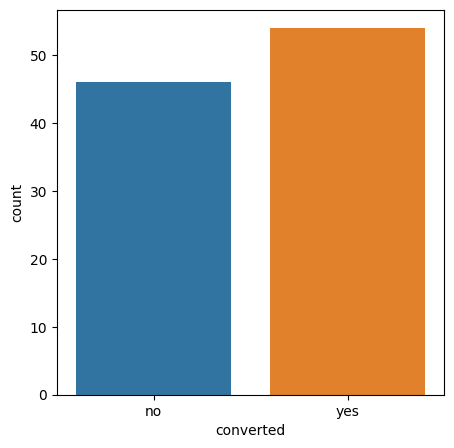

In [ ]:
# Visualize the 'Converted' variable using bargraph
plt.figure(figsize=(5,5))
sns.countplot(data=df,x= 'converted')
plt.show()

### Observations



*   54 users have converted as subscribers of the E-news express.


*   46 users have not converted as subscribers.





### **Language Preferred**

### Check unique values and count

In [ ]:
# check the unique value
df['language_preferred'].unique()

array(['Spanish', 'English', 'French'], dtype=object)

There are three preferred languages of the user : Spanish, English and French.

In [ ]:
# check the count of the unique values
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

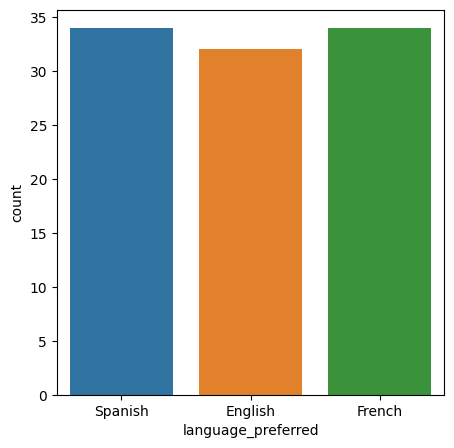

In [ ]:
# Visualize the 'language_preferred' using bargraph
plt.figure(figsize=(5,5))
sns.countplot(data=df,x= 'language_preferred')
plt.show()

### Observations


*   Spanish is preferred by 34 users.
*   French is preferred by 34 users.
*   English is preferred by 32 users.






## Bivariate Analysis

### **Landing page and the Time Spent on the page**

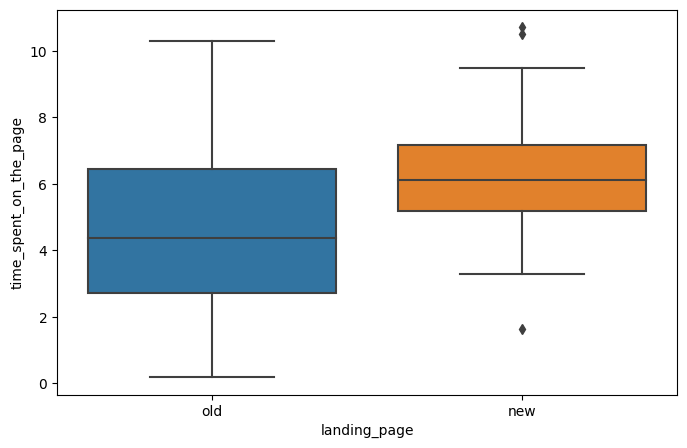

In [ ]:
# Visualize the relationship berween Landing page and the time spent using box plot
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

### Observations


*   The minimum time spent on the old page is around to 19 seconds which is very less compared to the new page.
*   The users of the new page have spent atleast a minimum of 1.5 minutes.
*   There are some outliers on both the sides of distribution on the time spent in the new page.
*   75% of users of the new page have spent less than 7 minutes on the page.






### **Language Preferred and the Time spent on the page**




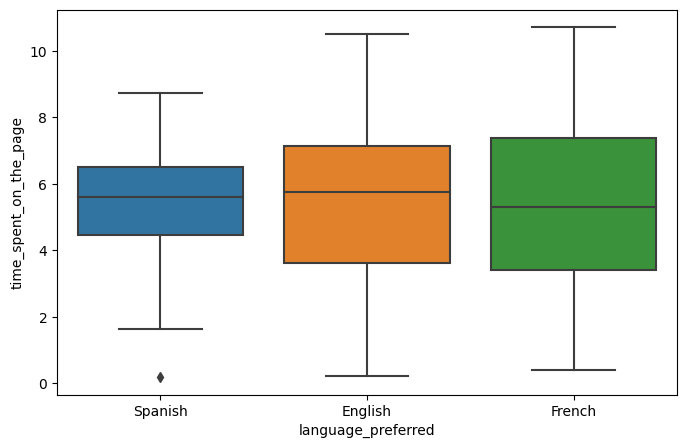

In [ ]:
# Visualize the relationship between the language preferred and the time spent
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page')
plt.show()

### Observations


*   There are three languages (Spanish, English and French) preferred by the users of E-News express.
*   The median time spent by the users who chose English and Spanish are close to around 5.7 minutes whereas the median time spent by the users who chose French to view the landing page is close to 5 minutes.
*   The maximum time spent by the users who chose English and French is around 10.7 minutes which is more compared to the maximum time spent by users who chose French language which is around 8.7 minutes.
*   There is an outlier in the time spent on the distribution of Spanish language.



### **Conversion Status and Time Spent on the page**

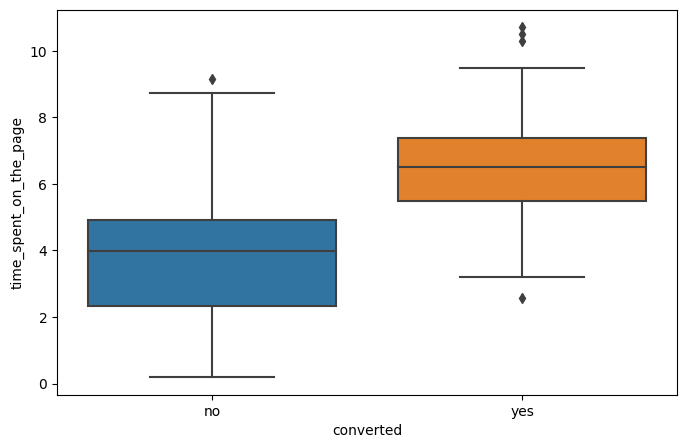

In [ ]:
# Visualize the relationship between the Conversion status and the time spent on the page
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='converted',y='time_spent_on_the_page')
plt.show()

### Observations


*   The users who did not subscribe to the E-News express have spent a minimum of 19 seconds which is very less compared to the users who became subscribers and spent atleast a mimimum time of 2.8 minutes on the page.
*   The median time spent by the users who became subscribers is around 7 minutes which is more compared to the median time of 4 minutes spent by users who did not subcribe.
*   The maximum time spent by the users who subscribed to the E-News express is more compared to the users who did not subscribe.
*   There are some outliers on both sides of the distribution of the converted status 'Yes' (users who subscribed).







## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

Boxplot is used here to Visualize the relationship between the time spent by the users on the new and old landing page

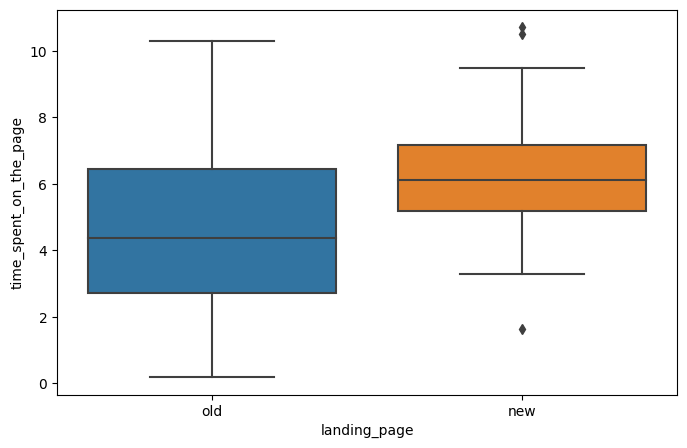

In [ ]:
# Visualize the relationship berween Landing page and the time spent using box plot
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

### **Observations**
From the above visualization on the relationship between the landing page and the time spent on the page we get the following observations.

*   The minimum time spent on the old page is around 19 seconds which is very less compared to the new page.
*   The users of the new page have spent atleast a minimum of 1.5 minutes.
*   There are some outliers on both the sides of distribution of the new landing page.
*   75% of users of the new page have spent less than 7 minutes on the page.

The summary gives a wholesome idea that the time spent by the users on the new landing page is more compared to the old landing page. This statement/claim can be tested using the following statistical test.

### Step 1: Define the null and alternate hypotheses


Let $\mu_1$ be the mean time spent by the user on the new landing page.

Let $\mu_2$ be the mean time spent by the user on the existing landing page.

Based on the above definition the null hypothesis is:

>$H_0:\mu_1=\mu_2$

the alternate hypothesis is

>$H_a:\mu_1>\mu_2$

### Step 2: Select Appropriate test

The question states about two independent population ie., users of the new landing page and the users of the existing landing page. The test we are going to perform is a one tailed test as we are testing whether the time spent by the user on the new landing page is greater than the time spent by the user on the existing landing page. The population standard deviation is unknown. Hence the test to perform for the formulated hypothesis is **Two independent sample t-test.**




### Step 3: Decide the significance level

As per the problem statement the level of significance $\alpha = 0.05$

### Step 4: Collect and prepare data

Lets collect the necessary data required for the Two sample t-test. Also lets evaluate if the sample standard deviation of the time spent on the page of the two populations are same.

In [11]:
# creating a dataframe with the time spent on the new landing page
timespent_n = df[df['landing_page']=='new']['time_spent_on_the_page']
#creating a dataframe with the time spent on the existing landing page
timespent_o = df[df['landing_page']=='old']['time_spent_on_the_page']
# calculate the sample standard deviation of the time spent on the new page
sd_n = round(timespent_n.std(),2)
sd_o = round(timespent_o.std(),2)
print(" The sample standard deviation of the time spent on the new page is", sd_n)
print(" The sample standard deviation of the time spent on the new page is", sd_o)

 The sample standard deviation of the time spent on the new page is 1.82
 The sample standard deviation of the time spent on the new page is 2.58


Since the sample standard deviation of the two population are different we are going to perform the **Two sample independent t-test with unequal standard deviation**.

### Step 5: Calculate the p-value

The ttest_ind() function in scipy is used to perform the two sample independent t-test.

The `ttest_ind()` function takes the sample observations, the variance value set as True or False and the direction of the alternative hypothesis as input and returns the test statistic and the p-value for the test.

1. The sample observations are the values of time spent by the user on the new landing page and the old landing page.
2. The variance equality factor is set to False since the sample standard deviation of the two population are different.
3. As it is a one-tailed test towards the right, we will set the argument `alternative = 'greater'`

In [5]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(timespent_n, timespent_o, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [12]:
# Conclusion based on the computed p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Based on the above computed test on the formulated hypothesis we can conclude that the p-value is less than the level of significance(0.05).

**Hence we reject the null hypothesis and have enough statistical evidence to show that the users spend more time on the new landing page than the existing landing page.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

Bargraph is used here to Visualize the proportion of conversion rate of the new landing page and the old landing page

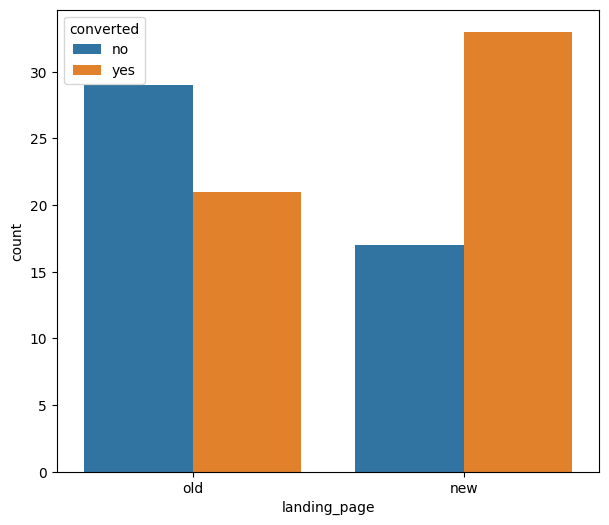

In [ ]:
#Visualize the conversion rate of the new landing page and old landing page
plt.figure(figsize=(7,6))
sns.countplot(data=df,x='landing_page',hue='converted')
plt.show()

### **Observations**


*   The number of users of the old landing page who have not converted as subscribers is more than the users who have become subscribers
*   The number of users of the new landing page who have not converted as subscribers is less than the users who have become subscribers

The graph gives us clear idea that the conversion rate of users of new landing is more compared to the old landing page. Let us confirm the observation from the above visualization using statistical test.






### Step 1: Define the null and alternate hypotheses

Let $p_1,p_2$ be the proportions of conversion rate of the new landing page and the old landing page.

The null hypothesis is:

>$H_0:p_1 =p_2$

The alternate hypothesis is:

>$H_a:p_1 >\ p_2$

### Step 2: Select Appropriate test

The question states about two independent population ie., conversion rate of the new landing page and the conversion rate of the old landing page and we are considering the proportion of users who have converted. Hence the test we are going to perform is a one tailed test as we are testing whether the conversion rate of the new landing page is more than the conversion rate of the old landing page. Hence the test to perform for the formulated hypothesis is **Two proportion Z-test.**




### Step 3: Decide the significance level

As per the problem statement the level of significance $\alpha = 0.05$

### Step 4: Collect and prepare data

Lets collect the necessary data required for the Two proportion Z-test. We require the data of the converted users of the new landing page and old landing page. Also the total users of the new landing page and the old landing page to perform the Two proportion Z-test

In [ ]:
# creating a subsetted dataframe with the users who converted
convert_y = df[df['converted']=='yes']
# calculate the number of users who have converted in the treatment group and the control group
new_converted_count = len(convert_y[convert_y.group == 'treatment'])
print("The number of users of the new landing page converted as subscribers is",new_converted_count)
old_converted_count = len(convert_y[convert_y.group == 'control'])
print("The number of users of the old landing page converted as subscribers is",old_converted_count)
# calculate the total number of users in the treatment group and the control group
new_total = df.group.value_counts()['treatment']
print("The total number of users of the new landing page is",new_total)
old_total = df.group.value_counts()['control']
print("The total number of users of the old landing page is",old_total)

The number of users of the new landing page converted as subscribers is 33
The number of users of the old landing page converted as subscribers is 21
The total number of users of the new landing page is 50
The total number of users of the old landing page is 50


### Step 5: Calculate the p-value

The proportions_ztest() function in scipy is used to perform the two proportion Z-test.

This function takes three arguments.

1. The count of the users who have converted as subscribers of the new and the old landing page.
2. The total number of users of the new and the old landing page.
3. The alternative argument is set as 'larger' since its a one tailed test.

In [ ]:
# import the required fuction
from statsmodels.stats.proportion import proportions_ztest

# find the p-value
test_stat, p_value = proportions_ztest([new_converted_count,old_converted_count],[new_total,old_total], alternative = 'larger')
print('The p-value is ' + str(p_value))

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# Conclusion based on the computed p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Based on the above computed test on the formulated hypothesis we can conclude that the p-value is less than the level of significance(0.05).

**Hence we reject the null hypothesis and have enough statistical evidence to show that the conversion rate of the users of new landing page is more than the old landing page.**

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

As per the question we need to find the dependency of two categorical variables, conversion and preferred language. Hence lets create a contingency table and then visualize the relationship between the variables using bargraph.

In [ ]:
# creating a contingency table to tabulate the frequencies of the two categorical variables
pd.crosstab(df.language_preferred,df.converted,margins=True)

converted,no,yes,All
language_preferred,,,
English,11,21,32
French,19,15,34
Spanish,16,18,34
All,46,54,100


### **Observations**


*   There are a total of 100 users.
*   Among the users who preferred English, 21 have become subscribers and 11 have not subscribed.
*   Among the users who preferred French, 15 have become subscribers and 19 have not subscribed.
*   Among the users who preferred Spanish, 18 have become subscribers and 16 have not subscribed.





<Figure size 800x500 with 0 Axes>

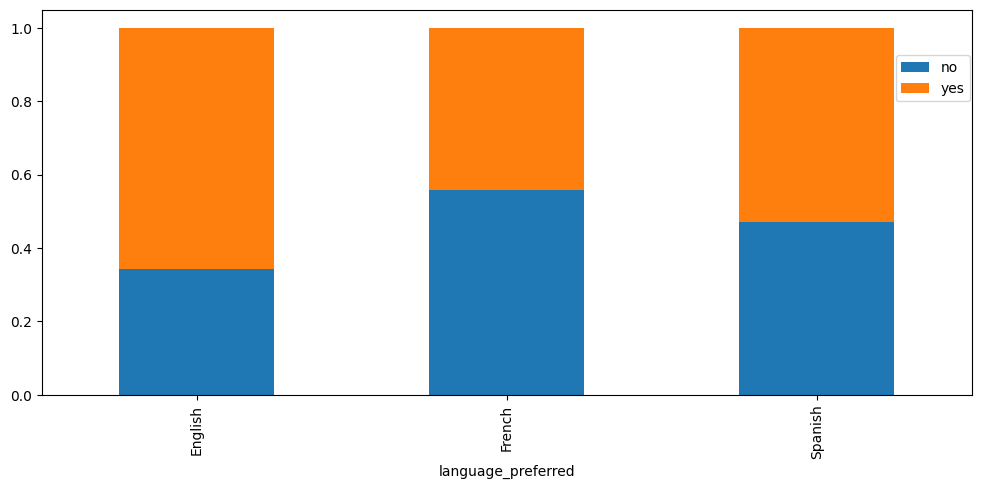

In [ ]:
# Visualize the frequencies of the variables converted and language preferred using stacked bargraph
plt.figure(figsize=(8,5))
pd.crosstab(df.language_preferred,df.converted,normalize='index').plot(kind='bar',figsize=(12,5),stacked=True)
plt.legend(bbox_to_anchor=(0.911,0.9))
plt.show()

### **Observations**

*   The proportion of the users who preferred English and converted as subscribers is more than those who have not converted.
*   The proportion of the users who preferred French and converted as subscribers is less than those who have not converted.
*  The proportion of the users who preferred Spanish and converted as subscribers is more than those who have not converted.





### Step 1: Define the null and alternate hypotheses

Lets formulate the null and the alternate hypothesis.

Null Hypothesis:

$H_0:$ Conversion status and the language preferred are independent of each other.

Alternate Hypothesis:

$H_a:$ Conversion status and the language preferred are not independent of each other.

### Step 2: Select Appropriate test

The question states about two categorical variables, Converted and language preferred. Hence to test the dependency between the two categorical variables lets perform the **Chi-Square test of independence** on the formulated hypothesis.

Let's check the assumptions for Chi-Square test is satisfied:

* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, the collected sample is a simple random sample.



### Step 3: Decide the significance level

As per the problem statement the level of significance $\alpha = 0.05$

### Step 4: Collect and prepare data

Lets collect the necessary data required for the Chi-Square test of independence. We require the contingency table with the values of the language preferred and the converted status to perform the test.

In [ ]:
# create contingency table of the categorical variables language preferred and converted
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

The chi2_contingency() function in scipy is used to perform the Chi-Square test for independence.

In [ ]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# Conclusion based on the computed p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Based on the above computed test on the formulated hypothesis we can conclude that the p-value is greater than the level of significance(0.05).

**Hence we fail to reject the null hypothesis as we do have enough statistical evidence to show that the conversion status and language preferred are independent of each other.**

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

As per the question we need to check whether the time spent by the users who preferred the languages English, Spanish and French on the new landing page are same. Hence lets create boxplots for the time spent by the users preferring each of the three languages, visualize the distribution and also analyse the variation on the average time spent between the three preferred languages on the new landing page.

In [ ]:
# creating a subset dataframe with the data of the new landing page
df_n = df[df['landing_page'] == 'new']

In [ ]:
# Finding the mean time spent on the new landing page by the three language (English, Spanish and French) users
df_n_time_mean = df_n.groupby('language_preferred')['time_spent_on_the_page'].mean()
print("The mean time spent by the English, French and Spanish language users on the new landing page is\n", df_n_time_mean)

The mean time spent by the English, French and Spanish language users on the new landing page is
 language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


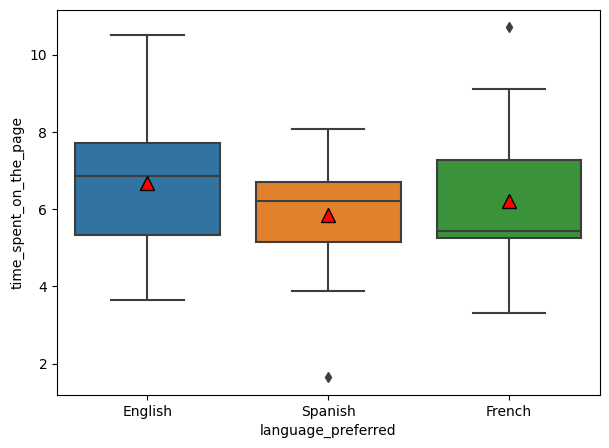

In [ ]:
# Visualize the relationship between the Language preferred and the time spent on the new landing page
plt.figure(figsize=(7,5))
sns.boxplot(data=df_n,x='language_preferred',y='time_spent_on_the_page',showmeans=True,meanprops={"markerfacecolor":"red",
                                                                                                  "markeredgecolor":"black","markersize":"10"})
plt.show()

### **Observations**



*   The median time spent by users who preferred English is more compared to Spanish and French.
*   The median time spent by users who preferred French is very low and is close to the 25th percentile.
*   The maximum time spent by the users who preferred English is more compared to Spanish and French.






### Step 1: Define the null and alternate hypotheses

Let $\mu_1, \mu_2, \mu_3$ be the means of time spent on the new landing page by the users who preferred Spanish, English and French.

Null hypothesis

The mean time spent on the new landing page by the users who preferred Spanish, English and French are same.

>$H_0: \mu_1 = \mu_2 = \mu_3$

Alternate hypothesis

>$H_a: $ At least the mean time spent on the new landing page by one language user is significantly different from the rest.

### Step 2: Select Appropriate test

The question states about the time spent by users who preferred three languages English, Spanish and French on the new landing page. Hence we are considering three independent population to compare and determine the results. The test to perform on the formulated hypothesis considering more than 2 independent population and finding the variation of the mean between them is **One way ANOVA test.**

To proceed with the One way ANOVA test we need to check if the assumptions of One way ANOVA test is satisfied. The assumptions for ANOVA test are,

1. The distribution of all the three population are normal.
2. The Population variances are equal.

To test the first assumption of normality lets perform the Shapiro Wilk's test and to test the equality of the variance of the populations lets perform the Levene test.


**Shapiro Wilk's test**

Lets formulate the Null and Alternative Hypothesis.

Null Hypothesis:

The time spent on the new page follows a normal distribution.

Alternative Hypothesis:

The time spent on the new page does not follow a normal distribution.

In [ ]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df_n['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040016293525696


As the p-value determined from the Shapiro Wilk's test is greater than the level of significance of 0.05, we fail to reject the Null Hypothesis. Hence we prove the first assumption of normality.

**Levene Test**

Lets formulate the Null and the Alternative Hypothesis.

Null Hypothesis:

The Population variances of all the three population are equal.

Alternative Hypothesis:

Atleast one Population variance is different from the rest.

In [ ]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene( df_n['time_spent_on_the_page'][df_n['language_preferred']=="English"],
                                   df_n['time_spent_on_the_page'][df_n['language_preferred']=="Spanish"],
                                   df_n['time_spent_on_the_page'][df_n['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


As the p-value determined from the Levene test is greater than the level of significance of 0.05, we fail to reject the Null Hypothesis. Hence we prove the second assumption, equality of variance.

### Step 3: Decide the significance level

As per the problem statement the level of significance $\alpha = 0.05$

### Step 4: Collect and prepare data

To perform one way ANOVA test, we need the time spent on the new page by each of the three language users. Hence lets collect the data for the same.

In [ ]:
# Creating three subset dataframes with the time spent by the English, Spanish and French language users on the new landing page
timespent_English = df_n[df_n['language_preferred'] == 'English']['time_spent_on_the_page']
timespent_Spanish = df_n[df_n['language_preferred'] == 'Spanish']['time_spent_on_the_page']
timespent_French = df_n[df_n['language_preferred'] == 'French']['time_spent_on_the_page']

### Step 5: Calculate the p-value

The f_oneway() function of Scipy will be used to compute the test statistic and p-value.

In [ ]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(timespent_English, timespent_Spanish, timespent_French)
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# Conclusion based on the computed p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Step 7:  Draw inference

Based on the above computed test on the formulated hypothesis we can conclude that the p-value is greater than the level of significance(0.05).

**Hence we fail to reject the null hypothesis as we do have enough statistical evidence to show that the time spent on the new landing page by the users who preferred the languages English, Spanish and French are same.**

## Conclusion and Business Recommendations

From the sample data of the abtest dataset, we observed that

*   75% of the users have spent atleast 7 minutes on the E-news express page.
*   The users atleast spend a minimum of 19 seconds on the E-new express landing page.
*   The mean and the median time spent on the page are almost same.

**Conclusions on the statistical tests performed:**
1. The statistical evidence (p-value of 0.00013 at 5% level of significance) confirm that the users spend more time on the new landing page compared to the old landing page of E-news express portal.
2. There is enough statistical evidence (p-value of 0.0080 at 5% level of significance) to conclude that the users of the new landing page who became subscribers of the E-news express portal is more compared to the old landing page.
3. The statistical evidence(p-value of 0.2129 at 5% level of significance) confirm that the rate of users who became subscribers of the
E-News express portal does not depend on the language they preferred to view the landing page.
4. There is enough statistical evidence(p-value of 0.4320 at 5% level of significance) to conclude that the time spent on the new landing page by all the three language users are same.

**Business Recommendations:**

The new landing page design has significantly increased the number of subscribers of the E-News express portal. The executive team of the E-News express can consider the design team's strategy on the redesigned version of the landing page and implement it to improve the business.


___